<a href="https://colab.research.google.com/github/Huiying-Z/hello-world/blob/master/auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTO MPG (MIGLIA PER GALLONE) DATASET

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML HANDS ON/datasets/wine_quality_red.csv', sep = ';')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
auto = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML HANDS ON/datasets/auto-mpg.data', names =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'], delim_whitespace=True)

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
auto['car name'].value_counts()

ford pinto                   6
ford maverick                5
toyota corolla               5
amc matador                  5
chevrolet impala             4
                            ..
buick century 350            1
pontiac grand prix           1
plymouth satellite custom    1
plymouth 'cuda 340           1
dodge rampage                1
Name: car name, Length: 305, dtype: int64

In [9]:

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ""
CHAPTER_ID = "Auto-mpg"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
auto.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
auto['horsepower'].hist(bins=10, figsize= (8,5))

In [10]:
np.random.seed(42)

# drop() 'car name' 

In [11]:
auto.drop('car name', axis = 1, inplace = True)

In [12]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [13]:
auto['origin'].value_counts()/len(auto['origin'])

1    0.625628
3    0.198492
2    0.175879
Name: origin, dtype: float64

Faccio una suddivisione stratificata dei dati in base a 'origin'

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sss.split(auto, auto['origin']):
  strat_train_set = auto.loc[train_index]
  strat_test_set = auto.loc[test_index] 

In [15]:
strat_test_set['origin'].value_counts()/len(strat_test_set)

1    0.625
3    0.200
2    0.175
Name: origin, dtype: float64

In [16]:
strat_train_set['origin'].value_counts()/len(strat_train_set)

1    0.625786
3    0.198113
2    0.176101
Name: origin, dtype: float64

In effetti vedo che le percentuali si sono rispettate rispetto a ORIGIN

# VISUALIZING DATA FOR INSIGHTS

In [28]:
auto_train = strat_train_set.copy()

In [29]:
corr_matrix = auto_train.corr()
corr_matrix["mpg"].sort_values(ascending = False)  #mi ridà i valori di correlazione rispetto a mpg in ordine descrescente

mpg             1.000000
model year      0.577319
origin          0.555897
acceleration    0.465990
cylinders      -0.777500
displacement   -0.802551
weight         -0.822468
Name: mpg, dtype: float64

Quindi vedo che l'attributo più importante è l'anno di produzione della macchina, mentre il peso e il displacement sono fortemente inversamente proporzionali.   

Saving figure scatter_matrix_plot


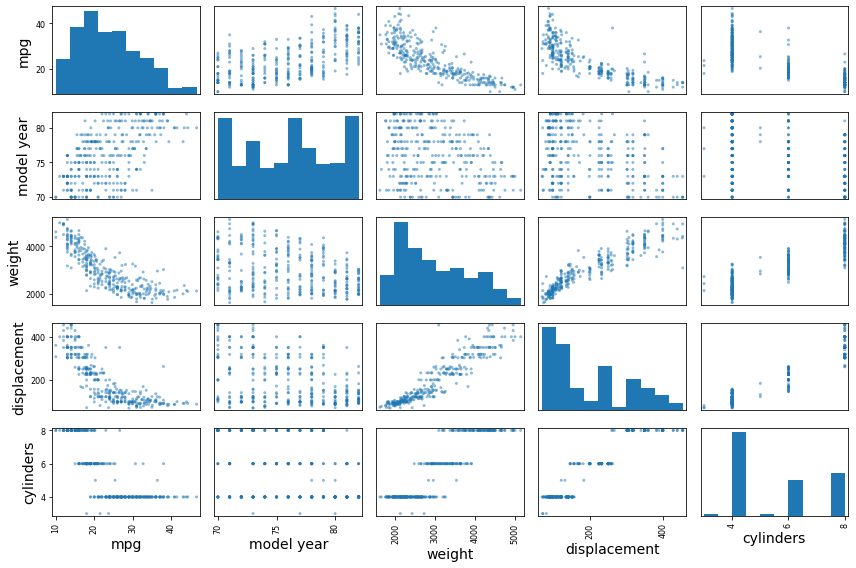

In [30]:
from pandas.plotting import scatter_matrix
attributes = ['mpg', 'model year', 'weight', 'displacement','cylinders']
scatter_matrix(auto_train[attributes],figsize=(12,8))
save_fig('scatter_matrix_plot')

In [27]:
corr_matrix["displacement"].sort_values(ascending = False) 
#noto una fortissima correlazione tra 'displacement' e 'cylinders' e 'weight'

displacement    1.000000
cylinders       0.950903
weight          0.934456
model year     -0.371366
acceleration   -0.572461
origin         -0.605754
mpg            -0.802551
Name: displacement, dtype: float64

In [37]:
auto_train["A"] = auto_train["cylinders"] / auto_train["displacement"]

In [36]:
type(auto_train["horsepower"])

pandas.core.series.Series